In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #标签必须是数字
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV , cross_val_score

In [2]:
data = pd.read_csv(r'data.csv')#r 等同于/ 或者\\
#data

In [3]:
data.info()# 891行，列的信息:乘客Id,是否存活 乘客等级Pclass Cabin仓位 Embarked登仓船接口
# object都需转为数字 Cabin仓位缺失值很多，要处理

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(10)#默认是5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#筛选特征： 
data.drop(['Cabin','Name','Ticket'], inplace=True,axis=1)#直接删列特征，替换调（default：False）轴像为1直接操作列
data_test = data.drop([0,1] ,axis=0)#直接删列特征，替换调（default：False）轴像为1直接操作列
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
# 年龄缺失值的填补
data['Age'] = data['Age'].fillna(data['Age'].mean()) #pandas基本操作，data['列名']将列取出是一个Series,numpy形式
#fillna就是填充缺失值:0,中值，高级算法随机森林。
data.info() # 注意： 4   Age          891 non-null    float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [7]:
# 由于Embarked的数据只有两行缺失，太少直接删掉。
data.dropna(inplace=True,axis=0)#axis默认是0#删除缺失行
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [8]:
data['Embarked'].unique() #查看独特类别，由于是一个数组，我们要tolist变为列表
#输出： array(['S', 'C', 'Q'], dtype=object)

array(['S', 'C', 'Q'], dtype=object)

In [9]:
labels = data['Embarked'].unique().tolist()#data['Embarked'].unique() #['S', 'C', 'Q']#unique不超过10个

In [10]:
labels.index('C')# 1

1

In [11]:
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))
#在data['Embarked']这一列上使用apply这一匿名函数操作
#列表项转为索引，换成数字使决策树可用
#以上仅适用于分类型变量无顺序，不可计算相互独立情形
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [14]:
data['Sex'] = (data["Sex"] == "male").astype('int')#将布尔值转为整数,直接data['Sex']以后将不能用
#data.loc[:,'Sex'] = (data.loc[:,'Sex'] == 'male').astype('int')# loc文字标签索引[row:列]

In [15]:
 data.iloc[:,3]#iloc数字标签索引

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [17]:
data.columns# Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked'],dtype='object')
data.columns != 'Survived'#array([ True, False,  True,  True,  True,  True,  True,  True,  True])

array([ True, False,  True,  True,  True,  True,  True,  True,  True])

In [19]:
#scikit特征与标签分开进行导入
x = data.iloc[:,data.columns != 'Survived']# 使用了布尔索引
y = data.iloc[:,data.columns == 'Survived']

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)#划分30%数据为测试集

In [23]:
print(Xtrain.shape) #(622,8) 
print(Xtrain.shape[0])#622
Xtrain.index = range(Xtrain.shape[0])#0~621

(622, 8)
622


In [25]:
for i in [Xtrain, Xtest, Ytrain, Ytest]:#将随机操作后乱序的索引变为有序索引，有必要纠正
    i.index = range(i.shape[0])

In [26]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,474,2,0,23.000000,0,0,13.7917,1
1,604,3,1,44.000000,0,0,8.0500,0
2,196,1,0,58.000000,0,0,146.5208,1
3,651,3,1,29.699118,0,0,7.8958,0
4,726,3,1,20.000000,0,0,8.6625,0
...,...,...,...,...,...,...,...,...
617,384,1,0,35.000000,1,0,52.0000,0
618,436,1,0,14.000000,1,2,120.0000,0
619,277,3,0,45.000000,0,0,7.7500,0
620,122,3,1,29.699118,0,0,8.0500,0


In [27]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #精确度，分类模型的分数
score

0.7677902621722846

In [28]:
clf = DecisionTreeClassifier(random_state=25)# 同样模型
score = cross_val_score(clf, x, y, cv=10).mean()# 分数使用十次交叉验证的均值
score

0.7469611848825333

### 剪枝调参

In [34]:
# 画出学习曲线
tr = []# 训练集
te = []# 测试集

for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,
                                max_depth=i+1,
                                criterion='entropy')# 不纯度指标，过拟合不建议使用
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)    
print(max(te))

0.8166624106230849


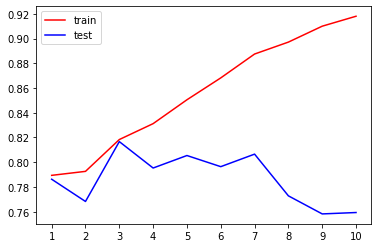

In [35]:
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()#图例
plt.show()

In [36]:
#网络搜索：能帮助我们调整多个参数，枚举技术，字典 （参数及取值范围）最佳效果参数的组合， 多个参数交叉进行，挨个试
#计算量大，耗时
import numpy as np
#gini_threholds = np.linspace(0,0.5,50)#gini指数边界
# entropy_threholes = np.linspace(0,1,50)#由公式知道取值范围0~1

#parameters 一串参数和这些参数对应的，我们希望网格搜索来搜索的参数的取值范围
parameters = {
    'criterion':('gini','entropy'),#基尼，信息熵
    'splitter':('best','random'),
    'max_depth':[*range(1,10)],#最大深度提供一个取值范围的列表
    'min_samples_leaf':[*range(1,50,5)],#5，15，20 ...
    'min_impurity_decrease':[*np.linspace(0,0.5,50)]# 信息增益最小值，难以界定。给定数据范围内，0~0.5内有顺序的50个随机数
}#np.arange()步长

clf = DecisionTreeClassifier(random_state=25)#实例化一个模型
GS = GridSearchCV(clf, parameters, cv=10)#实例化一个网格搜索（模型，参数列表，交叉验证次数）同时满足fit,score,交叉验证
GS = GS.fit(Xtrain, Ytrain)

In [37]:
GS.best_params_#从我们输入的参数和参数取值的列表中，返回最佳组合

{'criterion': 'entropy',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'random'}

In [38]:
score = GS.score(Xtest, Ytest)# 网格搜索后的模型的评价标准

In [39]:
score

0.8052434456928839

###网格搜索缺点